In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB

from helper import util_three_class
from sklearn.metrics import f1_score, confusion_matrix
import numpy as np
import os
import matplotlib.pyplot as plt

# 0. Train on types & count based

In [2]:
# train file name
train_file = '/path/to/9_FINAL/data/machine_learning/count_based/three_class/train/downsampled_to_types/train_0.csv'

In [3]:
# get x and y of train
X_train, y_train = util_three_class.read_file_and_drop_columns(train_file, 
                                                               ['instance', 'class', 'id', 'pids'])

In [4]:
# initialize Naive Bayes
nb = MultinomialNB()

In [5]:
# fit model on X_train
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# 1. Predict on Test

In [6]:
# get test
test = pd.read_csv('/path/to/9_FINAL/data/machine_learning/count_based/three_class/test.csv', 
                   sep=";", index_col=0)

In [7]:
# get head
test.head()

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label
66788,classics,publisher,10,4,9,184535989,"['p3a', 'p1', 'p3a', 'p1', 'p5', 'p5', 'p1', '...",3,0,0,...,0,0,3,0,0,0,0,0,0,2
310672,toast,burner,4,2,4,162571639,"['p5', 'p3a', 'p5']",0,0,0,...,0,0,2,0,0,0,0,0,0,2
13527,al,republic,1,1,1,141387873,['p8a'],0,0,0,...,0,0,0,0,0,1,0,0,0,2
58070,castle,joke,13,4,12,493248020,"['p8ap8b', 'p8ap8c', 'p8b', 'p8a', 'p8a', 'p8a...",0,0,0,...,0,1,0,0,0,7,4,1,0,2
71702,currier,printmaker,2,2,2,245326607,"['p5', 'p8b']",0,0,0,...,0,0,1,0,0,0,1,0,0,2


In [8]:
# sanity check for labels
test.label.value_counts()

2    342108
1      5823
0       190
Name: label, dtype: int64

In [9]:
# test path
test_path = '/path/to/9_FINAL/data/machine_learning/count_based/three_class/test.csv'

In [10]:
# predict on test
X_test, y_test = util_three_class.read_file_and_drop_columns(test_path, 
                                                               ['instance', 'class', 'id', 'pids'])

In [11]:
# sanity check
X_test

,frequency,pidspread,pldspread,p1,p10,p11,p12a,p12b,p12c,p13,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
66788,10,4,9,3,0,0,1,0,0,0,...,0,0,0,3,0,0,0,0,0,0
310672,4,2,4,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
13527,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
58070,13,4,12,0,0,0,0,0,0,0,...,0,0,1,0,0,0,7,4,1,0
71702,2,2,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159151,14,4,13,0,0,0,0,0,0,0,...,0,0,0,2,0,0,7,2,0,0
141128,7,3,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
227194,8,8,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
328857,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# predict on test
predict_test = nb.predict(X_test)

# 2. Get metrics on test

In [13]:
# get f1_score on test set
f1_score(y_test, predict_test, average='macro')

0.35642519991499566

In [14]:
# get confusion matrix 
confusion_matrix(y_test, predict_test)

array([[    33,     38,    119],
       [    86,    764,   4973],
       [  1423,  16643, 324042]])

In [15]:
# get all correctly classified indices
test_all = pd.read_csv('/path/to/9_FINAL/data/machine_learning/count_based/three_class/test.csv', 
                   sep=";", index_col=0)
test_all['Prediction'] = predict_test

# 3. Correctly classified

In [16]:
# show all instances where subclass prediction and actual are the same
subclasses_right=test_all[(test_all['label'] == 0) & (test_all['Prediction'] == 0)]
subclasses_right

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
348120,zebra,species,432,23,333,225199835,"['p6p5p4p1p10p20bp3a', 'p5p23cp23dp2p1p8ap3a',...",27,2,0,...,0,90,1,0,14,3,15,0,0,0
348040,distributor,agent,162,8,74,414096733,"['p36p5p4p1p20dp8ap3a', 'p4', 'p8a', 'p1p8a', ...",12,0,0,...,0,7,0,0,10,0,0,0,0,0
347947,burglar,criminal,157,9,119,47909601,"['p5p4p23dp2p1p8ap3a', 'p4', 'p1p8b', 'p3a', '...",25,0,0,...,0,8,0,0,2,3,0,0,0,0
347944,boxing,sport,4490,47,1892,117501051,['p7p6p5p4p2p1p43p26p15ap25p15bp24p20cp20bp20d...,102,13,11,...,3,221,3,2,757,119,3,5,0,0
348019,detector,sensor,1663,30,252,480267258,"['p26p16p5p34p4p1p10p3a', 'p16p5p4p1p8ap28bp3a...",69,4,0,...,0,348,0,0,289,2,3,0,0,0
347980,museum,building,2549,42,1541,104361281,['p5p4p2p1p10p12ap8ap8cp8bp21ap22ap23ep23ap21c...,183,14,1,...,1,351,1,2,633,38,5,0,0,0
348018,macaw,bird,381,22,260,202818911,"['p5p4p23dp2p1p25p21dp20dp8ap28bp3a', 'p5p4p23...",39,2,0,...,0,57,0,0,54,2,2,0,0,0
347950,child,person,8557,44,3480,162337557,['p7p6p5p4p2p1p43p26p15ap25p15bp24p20cp20bp20d...,153,23,1,...,17,164,38,1,613,131,21,8,0,0
348061,judge,person,1328,30,667,158184735,['p6p5p4p2p1p10p8ap8bp43p36p26p16p13p23ap25p23...,56,25,1,...,5,39,12,0,132,51,5,0,0,0
348107,synagogue,place,1026,19,617,16354862,"['p6p5p4p1p8ap27bp3a', 'p6p26p5p4p1p23ap23bp8a...",71,0,0,...,0,26,2,0,80,41,11,2,0,0


In [17]:
# get count of all used pids per row
count_subclasses_right = subclasses_right.drop(columns=['instance', 'class', 'frequency', 
                                                        'pidspread', 'pldspread', 'id', 'pids',
                                                       'Prediction', 'label']).sum()
count_subclasses_right = pd.DataFrame(count_subclasses_right).reset_index().sort_values(by=0, ascending=False)
count_subclasses_right.columns = ['pid', 'counts']
n_subclasses = count_subclasses_right.counts.sum()

In [18]:
# get top three observations and get fraction
count_subclasses_right = count_subclasses_right.iloc[:3,]
count_subclasses_right['percentage'] = count_subclasses_right['counts']/n_subclasses
count_subclasses_right.loc[3] = ['rest', n_subclasses-count_subclasses_right['counts'].sum(),
                                1-count_subclasses_right['percentage'].sum()]
count_subclasses_right['percentage'] = count_subclasses_right['percentage']*100

In [19]:
# sanity check
count_subclasses_right

,pid,counts,percentage
54,p8a,11504,33.617767
47,p3a,5185,15.151958
51,p5,4661,13.620690
3,rest,12870,37.609585


In [20]:
count_subclasses_right.index = count_subclasses_right.pid
count_subclasses_right

,pid,counts,percentage
pid,,,
p8a,p8a,11504,33.617767
p3a,p3a,5185,15.151958
p5,p5,4661,13.620690
rest,rest,12870,37.609585


In [21]:
# show all instances where types prediction and actual are the same
types_right=test_all[(test_all['label'] == 1) & (test_all['Prediction'] == 1)]
types_right

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
343151,acetone,product,87,13,58,438897111,"['p5p23ep4p23dp1p25p8ap20ap3a', 'p5p3a', 'p5',...",10,0,0,...,1,23,0,0,17,0,0,0,1,1
346611,socialism,movement,311,18,203,411869062,"['p5p1p10p8ap8bp3a', 'p5p8ap8bp3a', 'p10p8ap8b...",17,10,1,...,1,40,0,0,57,47,0,0,1,1
347473,paveway,bomb,11,3,11,74204520,"['p5p1p8a', 'p5', 'p8a', 'p5', 'p8a', 'p8a', '...",1,0,0,...,0,4,0,0,5,0,0,0,1,1
345337,leicestershire,place,10,3,5,131211868,"['p5p1', 'p16', 'p1', 'p16', 'p5', 'p16']",2,0,0,...,0,2,0,0,0,0,0,0,1,1
342558,lactulose,laxative,90,9,70,413339434,"['p5p4p1p25p8ap3a', 'p5p8ap27a', 'p5', 'p5p8a'...",1,0,0,...,0,9,0,0,10,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345785,ncsy,group,5,1,5,85612753,"['p5', 'p5', 'p5', 'p5']",0,0,0,...,0,4,0,0,0,0,0,0,1,1
342135,acetylacetone,ligand,7,1,4,53333662,"['p5', 'p5', 'p5', 'p5']",0,0,0,...,0,4,0,0,0,0,0,0,1,1
344006,cumin,herb,155,15,126,203714309,"['p6p5p4p2p1p8ap8bp16p23dp23ap25p23bp3a', 'p3a...",10,0,0,...,0,17,1,0,15,2,1,0,1,1
342592,methanethiol,thiol,5,2,5,68294175,"['p5p25', 'p5']",0,0,0,...,0,2,0,0,0,0,0,0,1,1


In [22]:
# get count of all used pids per row
count_types_right = types_right.drop(columns=['instance', 'class', 'frequency', 
                                              'pidspread', 'pldspread', 'id', 'pids',
                                             'Prediction', 'label']).sum()
count_types_right = pd.DataFrame(count_types_right).reset_index().sort_values(by=0, ascending=False)
count_types_right.columns = ['pid', 'counts']
n_types = count_types_right.counts.sum()

In [23]:
# get top three observations and get fraction
count_types_right = count_types_right.iloc[:3,]
count_types_right['percentage'] = count_types_right['counts']/n_types
count_types_right.loc[3] = ['rest', n_types-count_types_right['counts'].sum(),
                                1-count_types_right['percentage'].sum()]
count_types_right['percentage'] = count_types_right['percentage']*100

In [24]:
count_types_right.index = count_types_right.pid
count_types_right

,pid,counts,percentage
pid,,,
p8a,p8a,11196,32.860791
p5,p5,7810,22.922720
p3a,p3a,3365,9.876435
rest,rest,11700,34.340055


In [25]:
# show all instances where negatives prediction and actual are the same
negatives_right=test_all[(test_all['label'] == 2) & (test_all['Prediction'] == 2)]
negatives_right

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
310672,toast,burner,4,2,4,162571639,"['p5', 'p3a', 'p5']",0,0,0,...,0,2,0,0,0,0,0,0,2,2
13527,al,republic,1,1,1,141387873,['p8a'],0,0,0,...,0,0,0,0,1,0,0,0,2,2
58070,castle,joke,13,4,12,493248020,"['p8ap8b', 'p8ap8c', 'p8b', 'p8a', 'p8a', 'p8a...",0,0,0,...,1,0,0,0,7,4,1,0,2,2
71702,currier,printmaker,2,2,2,245326607,"['p5', 'p8b']",0,0,0,...,0,1,0,0,0,1,0,0,2,2
74022,durum,meal,1,1,1,205352395,['p26'],0,0,0,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168207,lager,prison,1,1,1,156582356,['p8a'],0,0,0,...,0,0,0,0,1,0,0,0,2,2
159151,kaleidoscope,album,14,4,13,68064313,"['p5', 'p8a', 'p8a', 'p3a', 'p8a', 'p8a', 'p8b...",0,0,0,...,0,2,0,0,7,2,0,0,2,2
141128,hominy,type,7,3,7,500423263,"['p2p8ap3a', 'p8a', 'p8a', 'p8a']",0,0,0,...,0,0,0,0,4,0,0,0,2,2
227194,peak,protein,8,8,7,6458294,"['p25', 'p38', 'p1', 'p28d', 'p8a', 'p23a', 'p...",1,0,0,...,0,0,0,0,1,1,0,0,2,2


In [26]:
# get count of all used pids per row
count_negatives_right = negatives_right.drop(columns=['instance', 'class', 'frequency', 
                                                      'pidspread', 'pldspread', 'id', 'pids',
                                                     'Prediction', 'label']).sum()
count_negatives_right = pd.DataFrame(count_negatives_right).reset_index().sort_values(by=0, ascending=False)
count_negatives_right.columns = ['pid', 'counts']
n_negatives = count_negatives_right.counts.sum()

In [27]:
# get top three observations and get fraction
count_negatives_right = count_negatives_right.iloc[:3,]
count_negatives_right['percentage'] = count_negatives_right['counts']/n_negatives
count_negatives_right.loc[3] = ['rest', n_negatives-count_negatives_right['counts'].sum(),
                                1-count_negatives_right['percentage'].sum()]
count_negatives_right['percentage'] = count_negatives_right['percentage']*100

In [28]:
count_negatives_right.index = count_negatives_right.pid
count_negatives_right

,pid,counts,percentage
pid,,,
p8a,p8a,644583,31.787965
p3a,p3a,244792,12.072052
p8b,p8b,182735,9.011677
rest,rest,955648,47.128306


# 4. Wrongly classified

In [29]:
# show all instances where subclass prediction and actual are not the same
subclasses_2=test_all[(test_all['label'] == 0) & (test_all['Prediction'] == 1)]
subclasses_2

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
348097,senator,person,236,20,128,274223657,"['p5p4p2p1p10p8ap8bp26p25p20cp20ap28bp3a', 'p3...",13,5,0,...,3,6,3,0,36,9,0,1,0,1
348015,referee,person,132,14,95,271858630,"['p6p26p5p4p1p25p20cp20dp8ap20a', 'p26', 'p4',...",4,2,0,...,0,3,1,0,13,3,0,0,0,1
348039,drummer,artist,69,12,60,266619724,"['p5p1p23ap8ap8b', 'p10', 'p8a', 'p3a', 'p5', ...",4,2,0,...,0,14,0,0,14,3,0,0,0,1
348076,pavilion,place,404,18,296,360735512,"['p4p1p20cp8ap8cp3a', 'p8ap8cp8b', 'p8ap8c', '...",13,1,0,...,1,19,0,0,196,26,8,0,0,1
347973,hymnal,book,60,11,50,498537403,"['p5p4p1p8b', 'p4p3a', 'p4p1', 'p8a', 'p1', 'p...",13,0,0,...,0,4,0,0,8,3,0,0,0,1
348109,termite,species,152,19,105,432799368,"['p5p34p23ap8c', 'p10', 'p5p1p3a', 'p5', 'p5p2...",5,2,0,...,0,30,0,0,17,0,12,1,0,1
347985,polysaccharide,biomolecule,29,5,11,507825676,"['p4p1p10', 'p1', 'p5', 'p27a', 'p5', 'p5', 'p...",4,1,0,...,0,3,0,0,0,0,0,0,0,1
348008,zebra,mammal,87,10,75,153157615,"['p7p5p1p3a', 'p5p1p23bp3a', 'p5', 'p1', 'p5p3...",13,0,0,...,0,16,0,1,2,0,0,0,0,1
348043,embargo,event,115,8,58,34715352,"['p1', 'p1', 'p5p3a', 'p4p3a', 'p1', 'p5p1', '...",8,0,0,...,0,15,0,0,2,4,0,0,0,1
348086,programmer,agent,3,2,3,475087145,"['p16', 'p5', 'p5']",0,0,0,...,0,2,0,0,0,0,0,0,0,1


In [30]:
# get count of all used pids per row
count_subclasses_2 = subclasses_2.drop(columns=['instance', 'class', 'frequency', 
                                                        'pidspread', 'pldspread', 'id', 'pids',
                                                       'Prediction', 'label']).sum()
count_subclasses_2 = pd.DataFrame(count_subclasses_2).reset_index().sort_values(by=0, ascending=False)
count_subclasses_2.columns = ['pid', 'counts']
n_subclasses_2 = count_subclasses_2.counts.sum()

In [31]:
# get top three observations and get fraction
count_subclasses_2 = count_subclasses_2.iloc[:3,]
count_subclasses_2['percentage'] = count_subclasses_2['counts']/n_subclasses_2
count_subclasses_2.loc[3] = ['rest', n_subclasses_2-count_subclasses_2['counts'].sum(),
                                1-count_subclasses_2['percentage'].sum()]
count_subclasses_2['percentage'] = count_subclasses_2['percentage']*100

In [32]:
count_subclasses_2.index = count_subclasses_2.pid
count_subclasses_2

,pid,counts,percentage
pid,,,
p8a,p8a,837,27.807309
p5,p5,599,19.900332
p3a,p3a,399,13.255814
rest,rest,1175,39.036545


In [33]:
# show all instances where subclass prediction and actual are not the same
subclasses_3=test_all[(test_all['label'] == 0) & (test_all['Prediction'] == 2)]
subclasses_3

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
347979,moped,motorcycle,34,8,27,258845408,"['p5p25p8ap3a', 'p3a', 'p37', 'p4', 'p3a', 'p1...",2,0,0,...,0,1,0,0,3,0,1,0,0,2
348108,teal,animal,4,4,4,310676819,"['p8a', 'p23d', 'p3a', 'p5']",0,0,0,...,0,1,0,0,1,0,0,0,0,2
348112,trojan,agent,7,5,6,113916569,"['p8b', 'p20c', 'p3a', 'p8a', 'p8a', 'p16']",0,0,0,...,0,0,0,0,2,1,0,0,0,2
347986,positivist,person,2,1,2,253395561,"['p8a', 'p8a']",0,0,0,...,0,0,0,0,2,0,0,0,0,2
348033,casebook,publication,4,3,4,83771389,"['p5', 'p1', 'p3a', 'p1']",2,0,0,...,0,1,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348068,magician,person,40,11,33,486351104,"['p4p23dp8a', 'p10p8a', 'p8a', 'p6', 'p8a', 'p...",0,1,0,...,1,1,1,0,14,1,0,0,0,2
347936,annelid,animal,16,6,12,275671687,"['p5p1p28b', 'p1', 'p8a', 'p3a', 'p5', 'p5', '...",2,0,0,...,0,3,0,0,1,0,0,0,0,2
347957,dramaturge,person,1,1,1,256172583,['p8a'],0,0,0,...,0,0,0,0,1,0,0,0,0,2
347955,creationist,person,7,5,4,144450668,"['p21a', 'p8a', 'p8a', 'p25', 'p3a', 'p6']",0,0,0,...,0,0,1,0,2,0,0,0,0,2


In [34]:
# get count of all used pids per row
count_subclasses_3 = subclasses_3.drop(columns=['instance', 'class', 'frequency', 
                                                        'pidspread', 'pldspread', 'id', 'pids',
                                                       'Prediction', 'label']).sum()
count_subclasses_3 = pd.DataFrame(count_subclasses_3).reset_index().sort_values(by=0, ascending=False)
count_subclasses_3.columns = ['pid', 'counts']
n_subclasses_3 = count_subclasses_3.counts.sum()

In [35]:
# get top three observations and get fraction
count_subclasses_3 = count_subclasses_3.iloc[:3,]
count_subclasses_3['percentage'] = count_subclasses_3['counts']/n_subclasses_3
count_subclasses_3.loc[3] = ['rest', n_subclasses_3-count_subclasses_3['counts'].sum(),
                                1-count_subclasses_3['percentage'].sum()]
count_subclasses_3['percentage'] = count_subclasses_3['percentage']*100

In [36]:
count_subclasses_3.index = count_subclasses_3.pid
count_subclasses_3

,pid,counts,percentage
pid,,,
p8a,p8a,796,29.168193
p3a,p3a,369,13.521436
p5,p5,275,10.076951
rest,rest,1289,47.233419


In [37]:
# show all instances where types prediction and actual are not the same
types_2=test_all[(test_all['label'] == 1) & (test_all['Prediction'] == 0)]
types_2

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
343896,christmas,day,3515,38,2073,486523030,['p6p5p4p2p1p12ap12cp43p26p25p20cp20bp20dp27bp...,47,15,4,...,10,105,6,0,432,200,7,5,1,0
345046,jug,container,478,22,355,261657145,"['p5p4p1p20bp28bp3a', 'p5p4p1p8ap3ap43', 'p5',...",56,0,0,...,2,98,1,0,14,2,1,0,1,0
347652,injector,component,303,21,186,183147055,"['p7p5p4p1p23ap27bp8bp3a', 'p5p1p10p3a', 'p5p4...",43,1,0,...,0,74,2,2,11,1,10,0,1,0
343784,bull,animal,799,33,548,300981265,['p7p6p5p4p2p1p10p8ap8bp43p26p16p23dp25p23bp11...,67,5,1,...,3,76,3,2,67,16,2,3,1,0
346120,poultry,bird,380,21,219,75846531,"['p6p5p4p2p1p26p16p34p23dp23ap25p24p28bp3a', '...",40,1,0,...,1,11,1,0,0,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343716,brontosaurus,reptile,6,1,4,109730250,"['p1', 'p1', 'p1']",3,0,0,...,0,0,0,0,0,0,0,0,1,0
343113,aarp,group,702,21,440,88033590,"['p7p6p5p4p1p10p8ap3a', 'p5p23cp1p8ap20ap3a', ...",49,7,0,...,0,67,1,2,30,1,1,0,1,0
344454,flood,hazard,911,28,511,164070863,['p6p5p4p1p10p12ap8ap8cp23cp23dp23ap25p20dp3a'...,44,6,0,...,0,123,1,0,4,1,26,1,1,0
343960,cluster,group,970,35,425,36188741,"['p36p26p5p4p2p1p23ap21dp28ap8ap8bp3a', 'p8ap8...",12,0,0,...,0,30,0,1,392,17,30,3,1,0


In [38]:
# get count of all used pids per row
count_types_2 = types_2.drop(columns=['instance', 'class', 'frequency', 
                                              'pidspread', 'pldspread', 'id', 'pids',
                                             'Prediction', 'label']).sum()
count_types_2 = pd.DataFrame(count_types_2).reset_index().sort_values(by=0, ascending=False)
count_types_2.columns = ['pid', 'counts']
n_types_2 = count_types_2.counts.sum()

In [39]:
# get top three observations and get fraction
count_types_2 = count_types_2.iloc[:3,]
count_types_2['percentage'] = count_types_2['counts']/n_types_2
count_types_2.loc[3] = ['rest', n_types_2-count_types_2['counts'].sum(),
                                1-count_types_2['percentage'].sum()]
count_types_2['percentage'] = count_types_2['percentage']*100

In [40]:
count_types_2.index = count_types_2.pid
count_types_2

,pid,counts,percentage
pid,,,
p8a,p8a,16735,24.880319
p5,p5,16416,24.406054
p1,p1,8571,12.742708
rest,rest,25540,37.970920


In [41]:
# show all instances where types prediction and actual are not the same
types_3=test_all[(test_all['label'] == 1) & (test_all['Prediction'] == 2)]
types_3

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
345736,myers,name,75,17,65,197145664,"['p5', 'p20cp8a', 'p10p8a', 'p8a', 'p5', 'p8ap...",1,2,0,...,0,11,0,0,18,5,1,0,1,2
344481,franeker,settlement,1,1,1,182411213,['p4'],0,0,0,...,0,0,0,0,0,0,0,0,1,2
345482,mdvanii,doll,1,1,1,70563818,['p8a'],0,0,0,...,0,0,0,0,1,0,0,0,1,2
345199,knipex,brand,3,3,3,116570500,"['p8a', 'p4', 'p5']",0,0,0,...,0,1,0,0,1,0,0,0,1,2
345310,l'argent,work,3,2,3,379876134,"['p8b', 'p10']",0,1,0,...,0,0,0,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347545,retapamulin,antibiotic,1,1,1,312950217,['p15a'],0,0,0,...,0,0,0,0,0,0,0,0,1,2
346355,rooibos,species,1,1,1,438223802,['p8a'],0,0,0,...,0,0,0,0,1,0,0,0,1,2
343200,aghalaya,place,1,1,1,362182289,['p1'],1,0,0,...,0,0,0,0,0,0,0,0,1,2
347672,paya,agent,1,1,1,93457556,['p8b'],0,0,0,...,0,0,0,0,0,1,0,0,1,2


In [42]:
# get count of all used pids per row
count_types_3 = types_3.drop(columns=['instance', 'class', 'frequency', 
                                              'pidspread', 'pldspread', 'id', 'pids',
                                             'Prediction', 'label']).sum()
count_types_3 = pd.DataFrame(count_types_3).reset_index().sort_values(by=0, ascending=False)
count_types_3.columns = ['pid', 'counts']
n_types_3 = count_types_3.counts.sum()

In [43]:
# get top three observations and get fraction
count_types_3 = count_types_3.iloc[:3,]
count_types_3['percentage'] = count_types_3['counts']/n_types_3
count_types_3.loc[3] = ['rest', n_types_3-count_types_3['counts'].sum(),
                                1-count_types_3['percentage'].sum()]
count_types_3['percentage'] = count_types_3['percentage']*100

In [44]:
count_types_3.index = count_types_3.pid
count_types_3

,pid,counts,percentage
pid,,,
p8a,p8a,11984,37.823507
p5,p5,3604,11.374826
p3a,p3a,3531,11.144426
rest,rest,12565,39.657240


In [45]:
negatives_2 = test_all[(test_all['label'] == 2) & (test_all['Prediction'] == 0)]

In [46]:
# get count of all used pids per row
count_negatives_2 = negatives_2.drop(columns=['instance', 'class', 'frequency', 
                                              'pidspread', 'pldspread', 'id', 'pids',
                                             'Prediction', 'label']).sum()
count_negatives_2 = pd.DataFrame(count_negatives_2).reset_index().sort_values(by=0, ascending=False)
count_negatives_2.columns = ['pid', 'counts']
n_negatives_2 = count_negatives_2.counts.sum()

In [47]:
# get top three observations and get fraction
count_negatives_2 = count_negatives_2.iloc[:3,]
count_negatives_2['percentage'] = count_negatives_2['counts']/n_negatives_2
count_negatives_2.loc[3] = ['rest', n_negatives_2-count_negatives_2['counts'].sum(),
                                1-count_negatives_2['percentage'].sum()]
count_negatives_2['percentage'] = count_negatives_2['percentage']*100

In [48]:
count_negatives_2.index = count_negatives_2.pid
count_negatives_2

,pid,counts,percentage
pid,,,
p8a,p8a,155613,25.371616
p3a,p3a,108181,17.638159
p5,p5,106681,17.393594
rest,rest,242860,39.596632


In [49]:
negatives_3 = test_all[(test_all['label'] == 2) & (test_all['Prediction'] == 1)]

In [50]:
# get count of all used pids per row
count_negatives_3 = negatives_3.drop(columns=['instance', 'class', 'frequency', 
                                              'pidspread', 'pldspread', 'id', 'pids',
                                             'Prediction', 'label']).sum()
count_negatives_3 = pd.DataFrame(count_negatives_3).reset_index().sort_values(by=0, ascending=False)
count_negatives_3.columns = ['pid', 'counts']
n_negatives_3 = count_negatives_3.counts.sum()

In [51]:
# get top three observations and get fraction
count_negatives_3 = count_negatives_3.iloc[:3,]
count_negatives_3['percentage'] = count_negatives_3['counts']/n_negatives_3
count_negatives_3.loc[3] = ['rest', n_negatives_3-count_negatives_3['counts'].sum(),
                                1-count_negatives_3['percentage'].sum()]
count_negatives_3['percentage'] = count_negatives_3['percentage']*100

In [52]:
count_negatives_3.index = count_negatives_3.pid
count_negatives_3

,pid,counts,percentage
pid,,,
p8a,p8a,100427,28.960277
p5,p5,92096,26.557855
p3a,p3a,40413,11.653954
rest,rest,113839,32.827914


# 5. Display charts

In [56]:
# stack data for visualization
data_to_visualize = [count_subclasses_right,
                     count_subclasses_2,
                     count_subclasses_3,
                     count_types_2,
                     count_types_right,
                     count_types_3,
                     count_negatives_2,
                     count_negatives_3,
                     count_negatives_right
                     ]

In [57]:
# titles
titles = ['Subclass - Subclass', 'Subclass - Type', 'Subclass - Negative',
         'Type - Subclass', 'Type - Type', 'Type - Negative',
         'Negative - Subclass', 'Negative - Type', 'Negative - Negative']

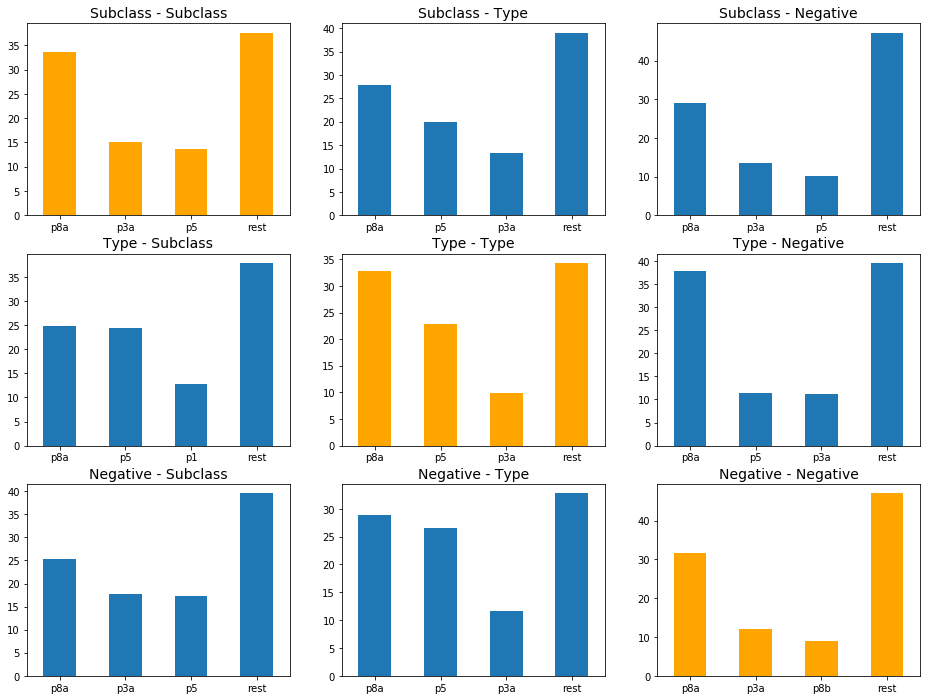

In [72]:
fig, axs = plt.subplots(3,3, figsize=(16,12))

counter = 0


for i in range(3):
    for j in range(3):
        if counter in [0,4,8]:
            color = 'orange'
        else:
            color = '#1f77b4'
            
        data_to_visualize[counter][['percentage']].plot(ax=axs[i,j], kind='bar', legend=False, color=color)
        axs[i,j].set_title(titles[counter], size=14)
        
        for tick in axs[i,j].get_xticklabels():
            tick.set_rotation(0)
        
        axs[i,j].set_xlabel('')
        counter += 1